In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [6]:
df = pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df = df.drop(columns=['Cabin'])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [9]:
# creating p class and sex feature
df['class_sex'] = df['Pclass'].astype(str) + '_' + df['Sex']

#filling missing values
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Fare'].fillna(df['Fare'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


C:\Users\nasih\AppData\Local\Temp\ipykernel_40408\2487297362.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\nasih\AppData\Local\Temp\ipykernel_40408\2487297362.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

In [10]:
#creating feature=age grp
def categorize_age(age):
    if age < 18:
        return 'child'
    elif 18 <= age <= 50:
        return 'adult'
    else:
        return 'aged'

df['age_group'] = df['Age'].apply(categorize_age)


print(df[['Age', 'age_group']].head())

    Age age_group
0  22.0     adult
1  38.0     adult
2  26.0     adult
3  35.0     adult
4  35.0     adult


In [11]:



df.replace({'Sex':{'male':1, 'female':0}, 'Embarked':{'S':0, 'C':1, 'Q':2}}, inplace=True)


C:\Users\nasih\AppData\Local\Temp\ipykernel_40408\3644121278.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Sex':{'male':1, 'female':0}, 'Embarked':{'S':0, 'C':1, 'Q':2}}, inplace=True)


In [12]:
X = df.drop(columns=['PassengerId', 'Survived', 'Name', 'Ticket', 'class_sex', 'age_group'], axis=1)
y = df['Survived']
#feature  selection

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
#splitting train and test dataset

In [14]:
model = LogisticRegression()
model.fit(X_train, y_train)
#model traingin

LogisticRegression()

In [15]:
y_pred = model.predict(X_test)


In [16]:
print("Accuracy:", accuracy_score(y_test, y_pred))



Accuracy: 0.7821229050279329


In [17]:
test_data = pd.read_csv('test.csv')
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [18]:
test_data['Age'].fillna(test_data['Age'].median(), inplace = True)
test_data['Fare'].fillna(test_data['Fare'].median(), inplace = True)

C:\Users\nasih\AppData\Local\Temp\ipykernel_40408\17466944.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_data['Age'].fillna(test_data['Age'].median(), inplace = True)
C:\Users\nasih\AppData\Local\Temp\ipykernel_40408\17466944.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

In [19]:
test_predict = test_data.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)


In [ ]:
test_predict.replace({'Sex': {'male': 1, 'female': 0}, 'Embarked': {'S': 0, 'C': 1, 'Q': 2}}, inplace=True)
test_predict.head()


C:\Users\nasih\AppData\Local\Temp\ipykernel_40408\1890337732.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_predict.replace({'Sex': {'male': 1, 'female': 0}, 'Embarked': {'S': 0, 'C': 1, 'Q': 2}}, inplace=True)


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,2
1,3,0,47.0,1,0,7.0000,0
2,2,1,62.0,0,0,9.6875,2
3,3,1,27.0,0,0,8.6625,0
4,3,0,22.0,1,1,12.2875,0


In [21]:
predictions = model.predict(test_predict)

In [22]:
# Create a DataFrame containing PassengerId and the corresponding predictions
submission_df = pd.DataFrame({'PassengerId': test_data['PassengerId'], 'Survived': predictions})

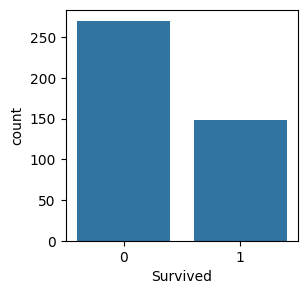

In [ ]:
# Countplot for 'Survived' column
plt.figure(figsize=(3, 3))
sns.countplot(x="Survived", data=submission_df)
plt.show()

# Save the DataFrame as a CSV file
submission_df.to_csv('submission.csv', index=False)